In [1]:
from bs4 import BeautifulSoup
import sys, urllib.request
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from collections import Counter
%matplotlib inline

In [2]:
rank_no=[]
artist=[]
music=[]
twitter=[]

In [3]:
def get_single_item_data(item_url, number_start =0,num_end =100):
        source_code = urllib.request.urlopen(item_url)  # get all source code
        source_text = source_code.read()
        #plain_text = source_text.decode('utf-8')
        #output = open('plain_text','w+')
        #output.write(plain_text)
        #output.close()
        soup = BeautifulSoup(source_text,"html.parser")
        #toplist = soup.find_all('table',{'class':'smv'}).find_all("tr")[0].find_all("td")td[3]
        toplist = soup.find_all('table',{'class':'smv'})
        Top_Emerging = toplist[0] # Emerging
        Top_Trending = toplist[1] # Trending updating fast in 6 seconds
        Top_Overall = toplist[2] # overall Comprehensive result
        #print(toplist[2])
        rank_list = toplist[1].find_all('tr')
        for rank in rank_list[number_start:num_end]:
            rank_no.append(rank.find_all('td')[0].text)
            artist.append(rank.find_all('td')[1].text)
            music_text = rank.find_all('td')[2].text
            music.append(music_text[0:(music_text.find("\n"))-1])
            twitter.append(rank.find_all('td')[1].find('a').get("href"))
        for i in np.arange(len(artist)).tolist()[0:5]:
            print("ranking No:"+str(i+1)+"   artist:"+artist[i]+"  music:"+music[i]+'\n')
            print(twitter[i]+'\n')


In [4]:
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$  11-30 song and Singers need to be promoted  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n")
get_single_item_data("http://realtime.billboard.com/?chart=trending140", 10, 30)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$  20-40 song and Singers need to be promoted  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

ranking No:1   artist:Robin Thicke  music:Back Together (feat. Nicki Minaj)

http://twitter.com/robinthicke

ranking No:2   artist:One Direction  music:Walking In The Wind

http://twitter.com/onedirection

ranking No:3   artist:One Direction  music:End of the Day

http://twitter.com/onedirection

ranking No:4   artist:2 Chainz  music:Watch Out

http://twitter.com/2chainz

ranking No:5   artist:Travi$ Scott  music:Antidote

http://twitter.com/trvisXX



In [5]:
Top_Trending_df = pd.DataFrame({'No_':rank_no, 'artist': artist, 'music':music, 'Twitter':twitter})

In [6]:
def addprice_discount_pd (raw_pd, price_low, price_high):
    pd_length = len(list(raw_pd.index))
    price = ['{0:.2f}'.format(np.random.uniform(price_low,price_high)) for i in list(range(pd_length))]  
    # price distribution can be optimized currently uniform
    discount =['{0:.1f}'.format((1/int(rank))*10) for rank in list(raw_pd.No_)]  # discount will be optimized later
    raw_pd["price"] = pd.Series(price, index=raw_pd.index)
    raw_pd["discount"] = pd.Series(discount, index=raw_pd.index)
    return 
  

In [7]:
addprice_discount_pd(Top_Trending_df, 8,10)

In [13]:
Top_Trending_df

,No_,Twitter,artist,music,price,discount
0,11,http://twitter.com/robinthicke,Robin Thicke,Back Together (feat. Nicki Minaj),9.93,0.9
1,12,http://twitter.com/onedirection,One Direction,Walking In The Wind,8.35,0.8
2,13,http://twitter.com/onedirection,One Direction,End of the Day,8.80,0.8
3,14,http://twitter.com/2chainz,2 Chainz,Watch Out,9.37,0.7
4,15,http://twitter.com/trvisXX,Travi$ Scott,Antidote,8.21,0.7
5,16,http://twitter.com/rickyrozay,Rick Ross,One of Us,9.38,0.6
6,17,http://twitter.com/PanicAtTheDisco,Panic! At the Disco,Victorious,9.98,0.6
7,18,http://twitter.com/ShawnMendes,Shawn Mendes,I Know What You Did Last Summer (feat. Camila ...,8.91,0.6
8,19,http://twitter.com/coldplay,Coldplay,Hymn for the Weekend (feat. Beyoncé),9.51,0.5
9,20,http://twitter.com/Chet_Faker,Chet Faker,The Trouble with Us (feat. Marcus Marr),9.47,0.5


In [9]:
Top_Trending_df.describe()

,No_,Twitter,artist,music,price,discount
count,20,20,20,20,20,20
unique,20,18,18,20,20,7
top,28,http://twitter.com/onedirection,Ty Dolla $ign,Bitch I'm Madonna,9.98,0.4
freq,1,2,2,1,1,6


------------top 20 songs------18 singers in total---------


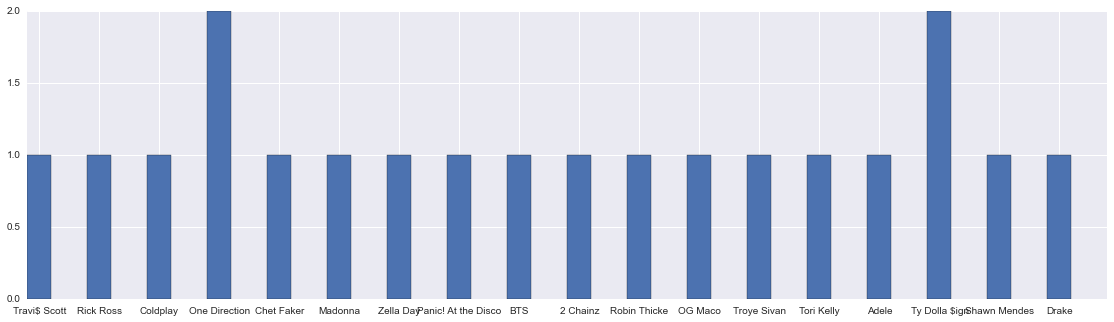

In [10]:
count = dict(Counter(artist))
#print(count)

xVals = list(count.keys())
yVals = list(count.values())
print("------------top 20 songs------"+str(len(np.unique(xVals)))+" singers in total---------")
#print(np.unique(xVals))
x = tuple(np.arange(len(xVals)))
width = 0.4
ax = plt.subplot(111)
ax.set_position([5,2,2.5,1])
ax.bar(x, yVals, width)
ax.set_xticks([i+width/2 for i in x])
ax.set_xticklabels(xVals)
plt.rcParams['font.size'] = 80


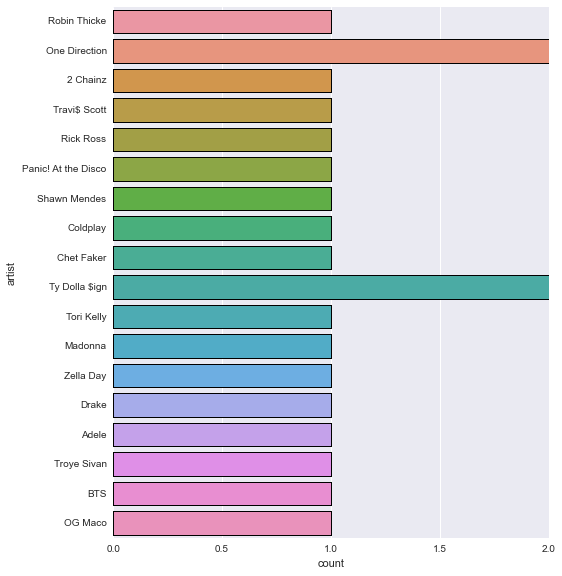

In [11]:
sns.factorplot(y='artist', data=Top_Trending_df, kind='count',size=10,linewidth=1)

In [12]:
Top_Trending_df.to_csv("Top_Trending_top11_30_price_discount.csv", index=False)